# ML Project LifeCycle

- framing and understanding of Problem
- data collection
- data cleaning
- data preprocessing 
- EDA
- model training 
- model selection


In [2]:
# import libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
# Read the dataset

studentData=pd.read_csv("StudentsPerformance.csv")
studentData

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## check the statistics

- check for missing values
- check for dublicates
- check for features
- check for categories in features
- check for maths
- check for unique values in each column


In [4]:
studentData.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### there is no null values in any of the column

In [5]:
studentData.duplicated().sum()

np.int64(0)

### there is no dublicated value

In [6]:
print(f"categories in gender column are : {studentData["gender"].unique()}")
print(f"categories in race/ethnicity column are : {studentData["race/ethnicity"].unique()}")
print(f"categories in parental level of education column are : {studentData["parental level of education"].unique()}")
print(f"categories in lunch column are : {studentData["lunch"].unique()}")
print(f"categories in test preparation course column are : {studentData["test preparation course"].unique()}")


categories in gender column are : ['female' 'male']
categories in race/ethnicity column are : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education column are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch column are : ['standard' 'free/reduced']
categories in test preparation course column are : ['none' 'completed']


In [7]:
# checking for how many features are categorical and how many are numerical

numericalFeatures=[feature for feature in studentData.columns if studentData[feature].dtype != 'O' ]
categoricalFeatures=[feature for feature in studentData.columns if studentData[feature].dtype == 'O' ]

print(f"numerical features are {len(numericalFeatures)}: {numericalFeatures}")
print(f"cateforical features are {len(categoricalFeatures)}: {categoricalFeatures}")

numerical features are 3: ['math score', 'reading score', 'writing score']
cateforical features are 5: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [8]:
# info of the dataset

studentData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
studentData.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Adding total scores and average

In [10]:
studentData['totalScore']=studentData['math score']+studentData['reading score']+studentData['writing score']
studentData['average']=studentData['totalScore']/3
studentData.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


### taking how many students got full marks 


In [14]:
totalStudentInMaths=studentData[studentData['math score']==100]['average'].count()
totalStudentInReading=studentData[studentData['reading score']==100]['average'].count()
totalStudentInWriting=studentData[studentData['writing score']==100]['average'].count()

print(f"total students who got full marks in maths are : {totalStudentInMaths}")
print(f"total students who got full marks in reading are : {totalStudentInReading}")
print(f"total students who got full marks in writing are : {totalStudentInWriting}")


total students who got full marks in maths are : 7
total students who got full marks in reading are : 17
total students who got full marks in writing are : 14


In [19]:
below25Maths=studentData[studentData['math score']<=25]['average'].count()
below25Reading=studentData[studentData['reading score']<=25]['average'].count()
below25Writing=studentData[studentData['writing score']<=25]['average'].count()

print(f"total students who got  marks in maths <= 25 are : {below25Maths}")
print(f"total students who got full marks in reading <=25 are : {below25Reading}")
print(f"total students who got full marks in writing <=25 are : {below25Writing}")



total students who got  marks in maths <= 25 are : 7
total students who got full marks in reading <=25 are : 4
total students who got full marks in writing <=25 are : 5


##### Insight: students have performed good in reading section , as most of the student get full marks in reading section and less student get marks less than 25

## Exploring Data

#### Histogram and KDE

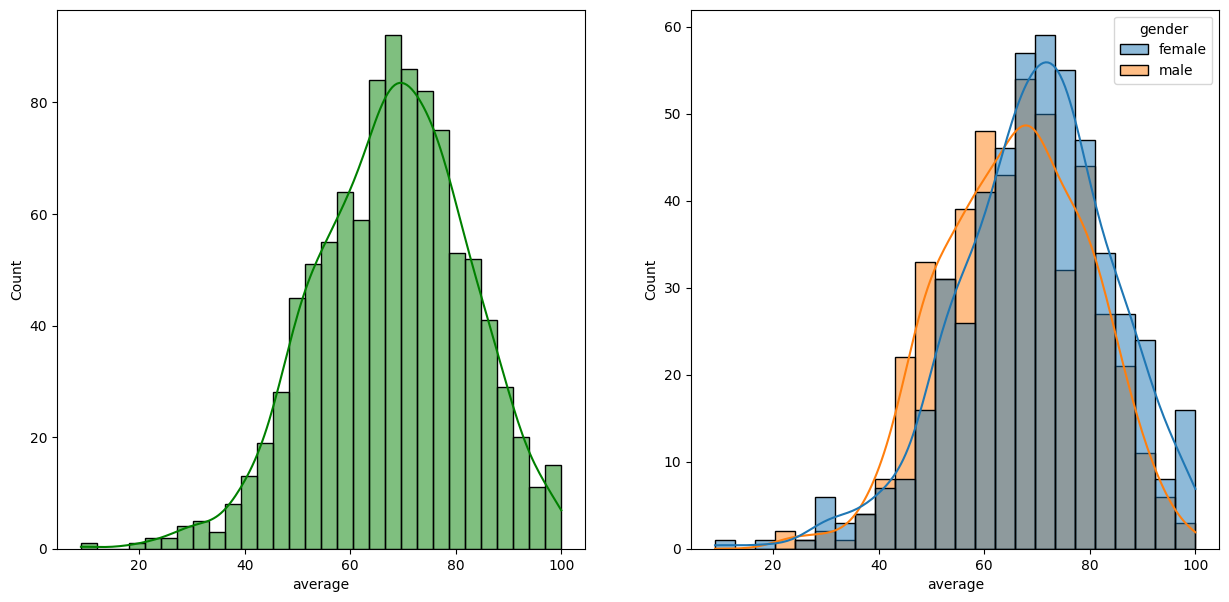

In [25]:
fig,ax=plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(data=studentData,x="average", bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=studentData,x="average",kde=True,hue="gender")
plt.show()

##### female student have performed well

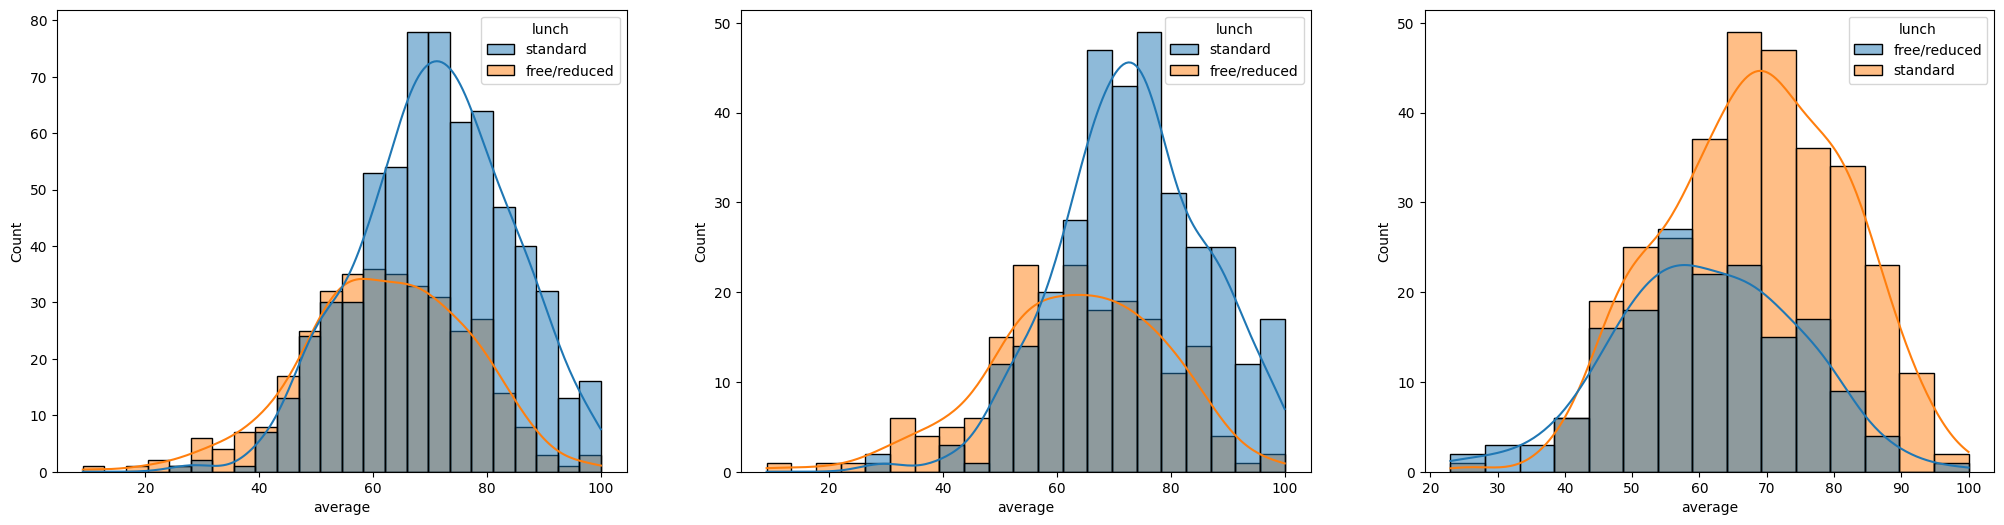

In [35]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=studentData,x="average",kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=studentData[studentData.gender=="female"],x="average",kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=studentData[studentData.gender=="male"],x="average",kde=True,hue="lunch")
plt.show()

##### Standard Lunch helps the student in scoring good marks regardless of gender

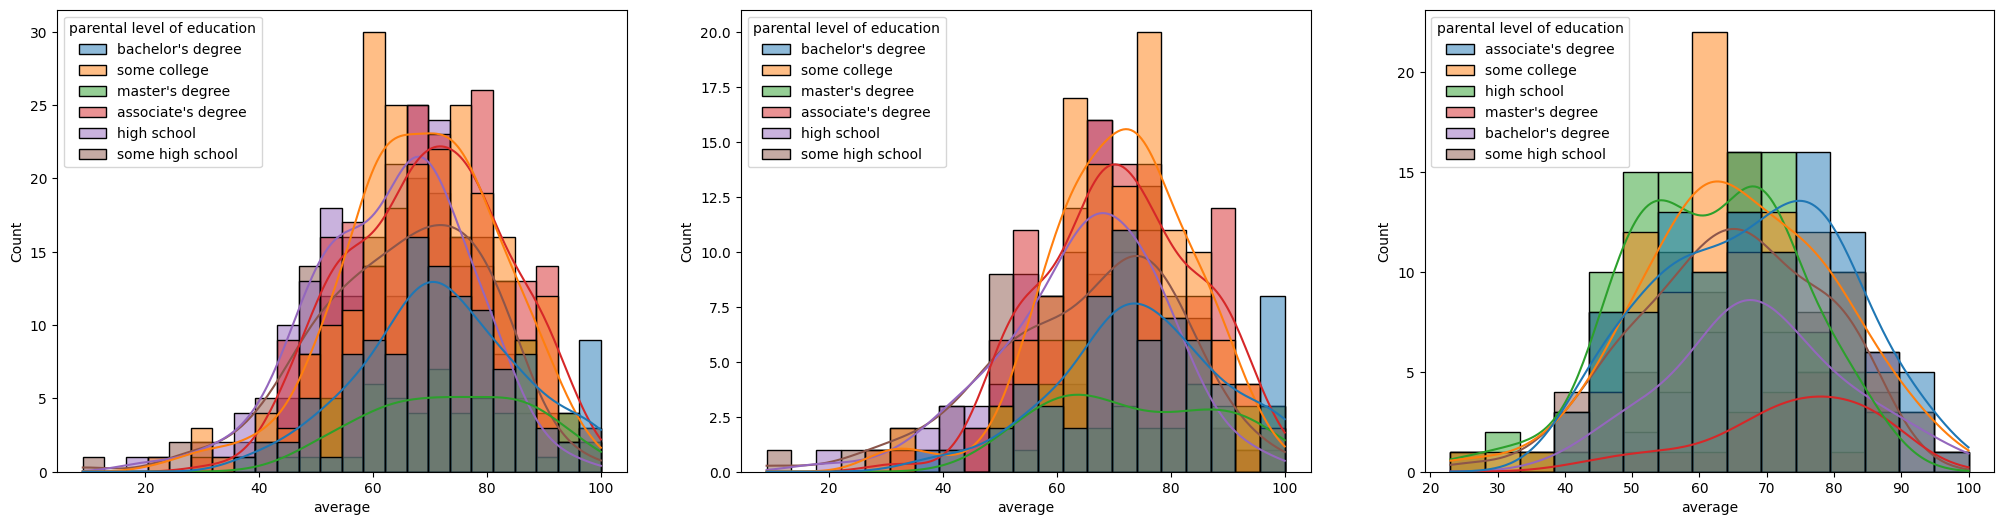

In [39]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=studentData,x="average",kde=True,hue="parental level of education")
plt.subplot(132)
sns.histplot(data=studentData[studentData.gender=="female"],x="average",kde=True,hue="parental level of education")
plt.subplot(133)
sns.histplot(data=studentData[studentData.gender=="male"],x="average",kde=True,hue="parental level of education")
plt.show()

#### Insights : there is not a strong relation between the parental level education and marks scored , but if we see in general then , parents having higher level of education have childern whose average marks are high

<Axes: xlabel='average', ylabel='Count'>

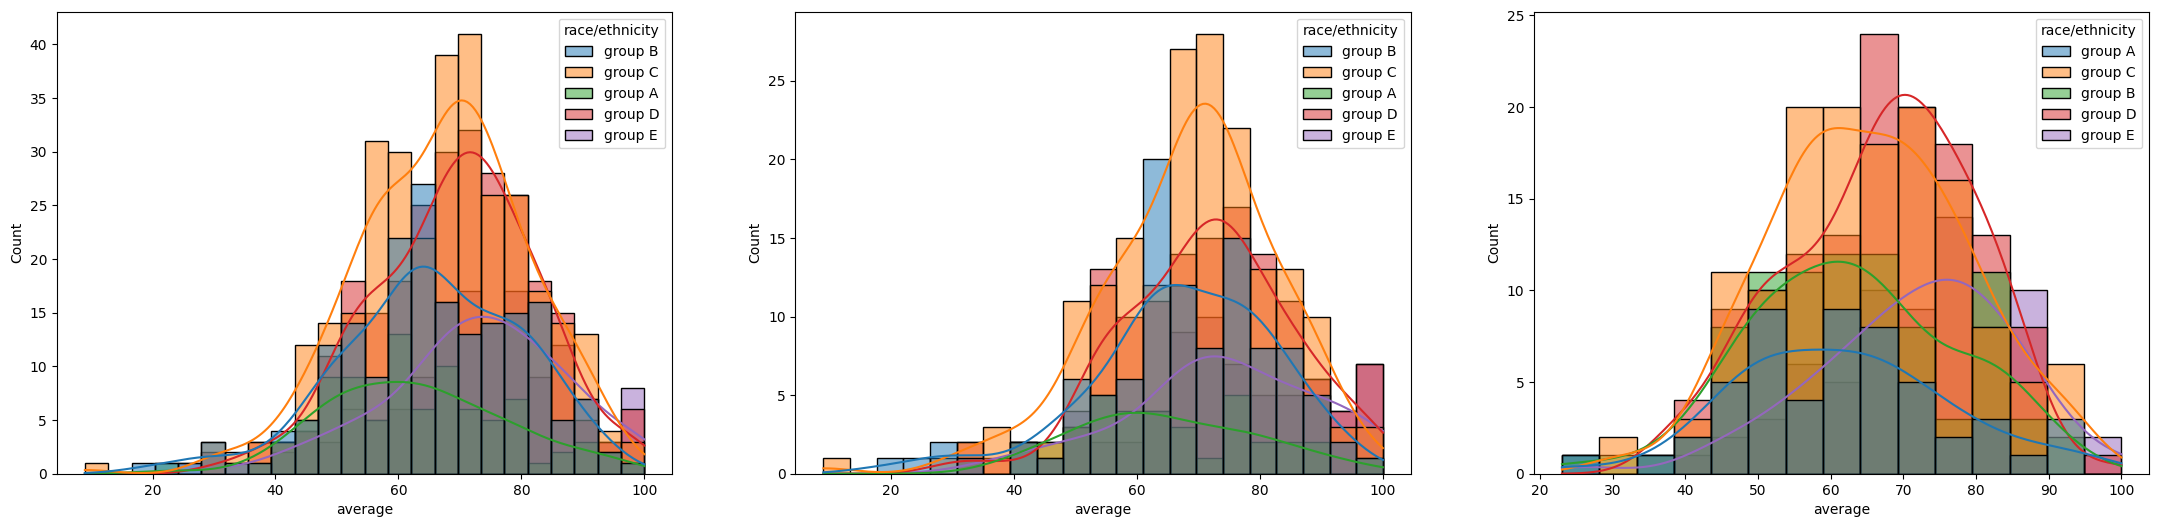

In [44]:
fig,ax=plt.subplots(1,3,figsize=(27,6))
plt.subplot(131)
sns.histplot(data=studentData,x="average",kde=True,hue="race/ethnicity")
plt.subplot(132)
sns.histplot(data=studentData[studentData.gender=="female"],x="average",kde=True,hue="race/ethnicity")
plt.subplot(133)
sns.histplot(data=studentData[studentData.gender=="male"],x="average",kde=True,hue="race/ethnicity")

##### Insights: 
- students of group A has more average score ,followed by group D and group C
- for females the trend is similar regarding average marks 
- for male the trend is quite different 
  - group E students has highest average followed by group D , group C

<Axes: xlabel='average', ylabel='Count'>

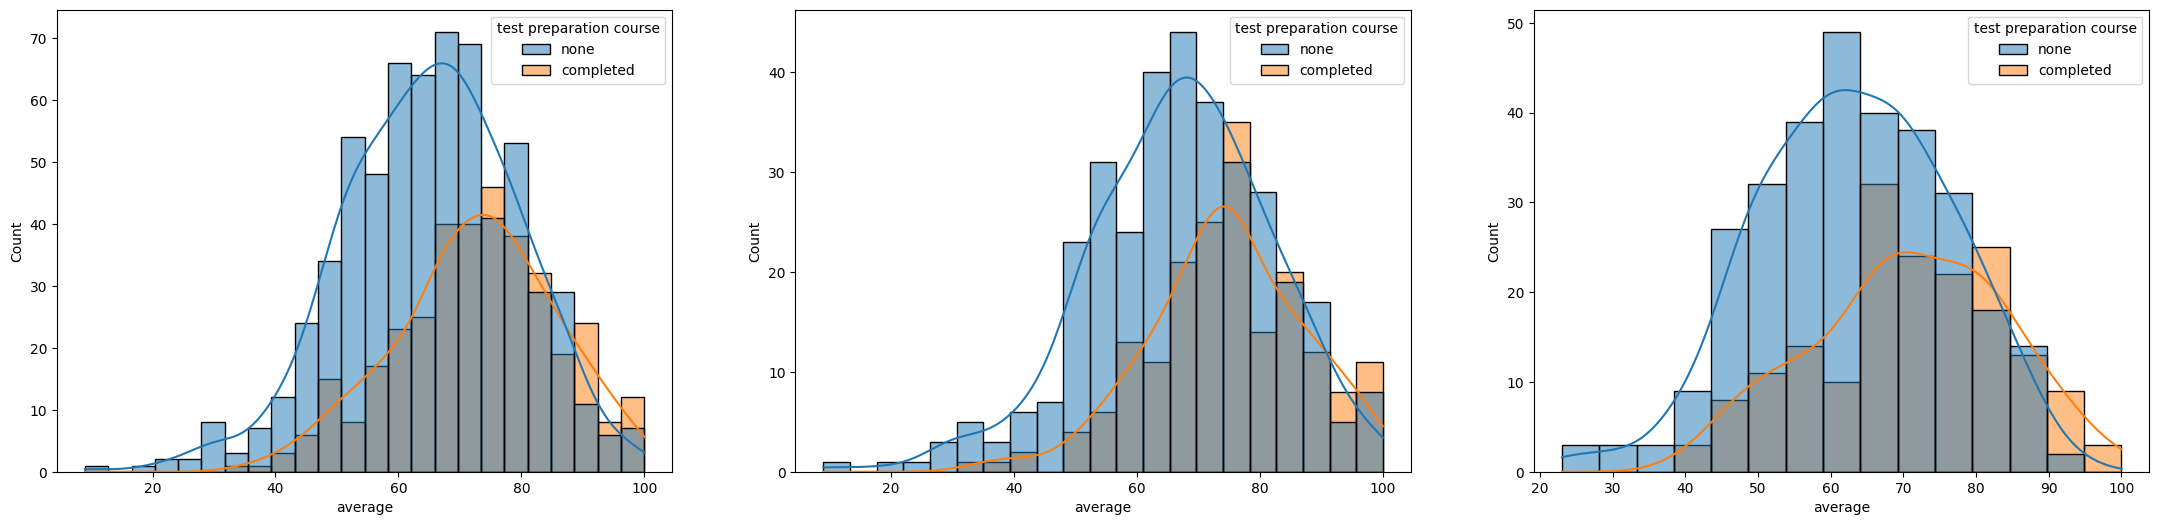

In [52]:
fig,ax=plt.subplots(1,3,figsize=(27,6))
plt.subplot(131)
sns.histplot(data=studentData,x="average",kde=True,hue="test preparation course")
plt.subplot(132)
sns.histplot(data=studentData[studentData.gender=="female"],x="average",kde=True,hue="test preparation course")
plt.subplot(133)
sns.histplot(data=studentData[studentData.gender=="male"],x="average",kde=True,hue="test preparation course")

##### Insights: students who had completed the test preparation course had higher average score 

<Axes: xlabel='gender', ylabel='writing score'>

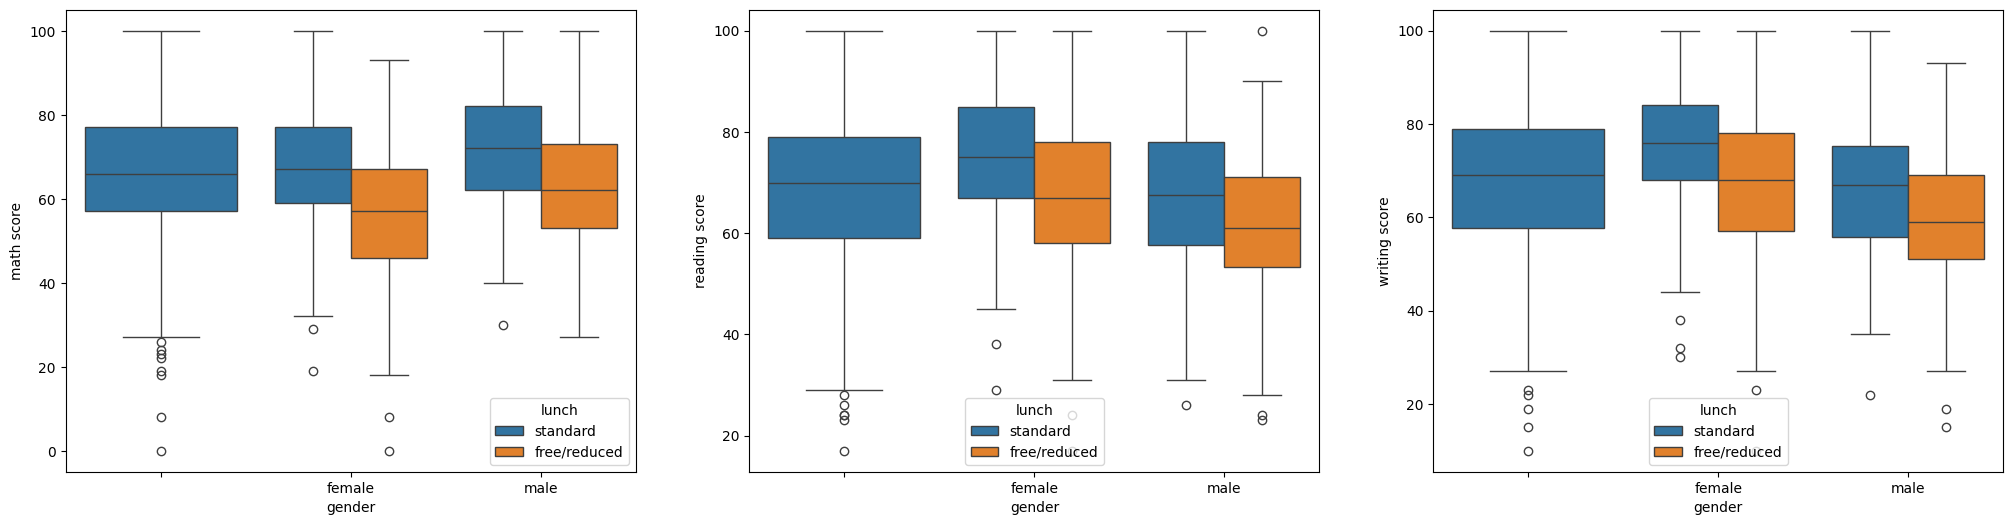

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.boxplot( data=studentData,y="math score")
sns.boxplot( data=studentData,x="gender",y="math score",hue="lunch")
plt.subplot(132)
sns.boxplot( data=studentData,y="reading score")
sns.boxplot( data=studentData,x="gender",y="reading score",hue="lunch")
plt.subplot(133)
sns.boxplot( data=studentData,y="writing score")
sns.boxplot( data=studentData,x="gender",y="writing score",hue="lunch")


##### Insights: 
- male has slightly higher maths score than that of females , but in reading and writing scores females had more  score 
- candidates with standard lunch has higher average

<Axes: xlabel='gender', ylabel='writing score'>

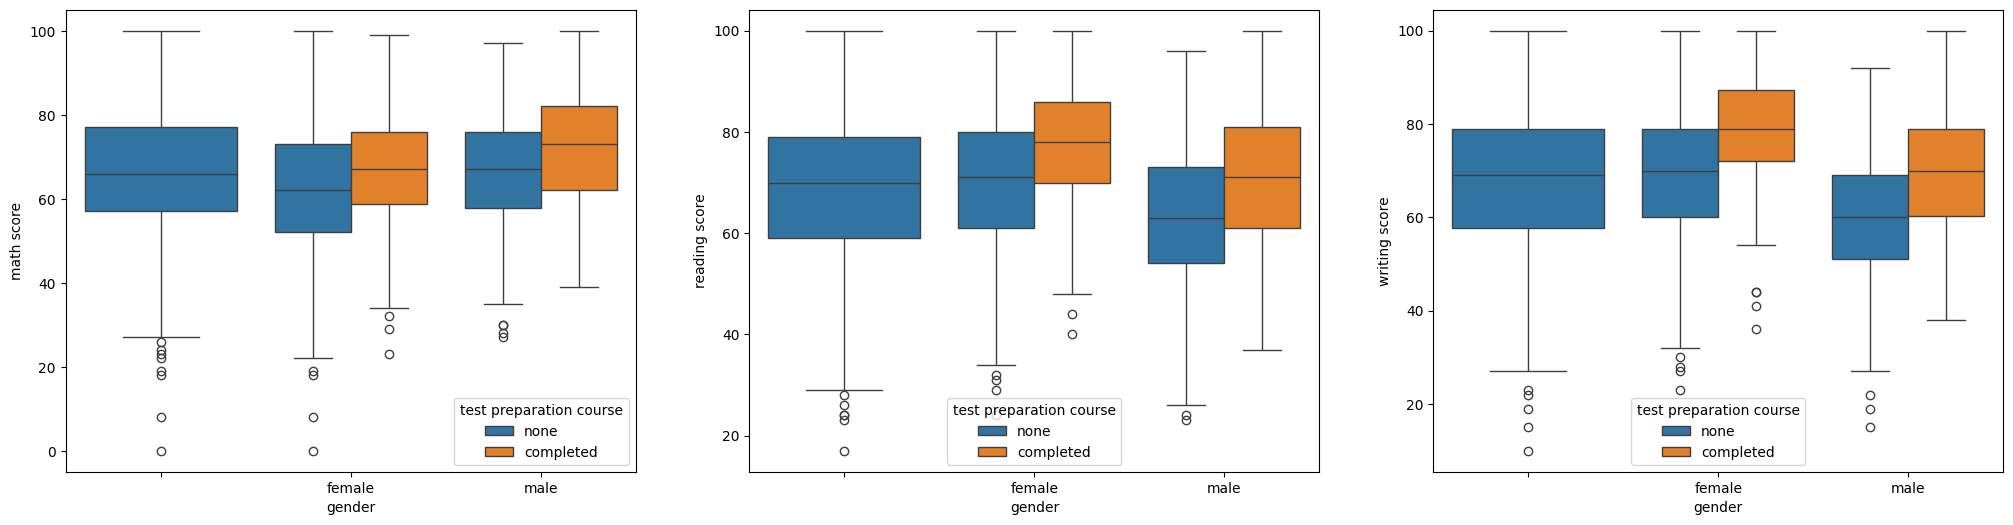

In [122]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.boxplot( data=studentData,y="math score")
sns.boxplot( data=studentData,x="gender",y="math score",hue="test preparation course")
plt.subplot(132)
sns.boxplot( data=studentData,y="reading score")
sns.boxplot( data=studentData,x="gender",y="reading score",hue="test preparation course")
plt.subplot(133)
sns.boxplot( data=studentData,y="writing score")
sns.boxplot( data=studentData,x="gender",y="writing score",hue="test preparation course")


##### Insights: 
- male has slightly higher maths score than that of females , but in reading and writing scores females had more  score 
- students who had completed the test preparation course have higher average score 

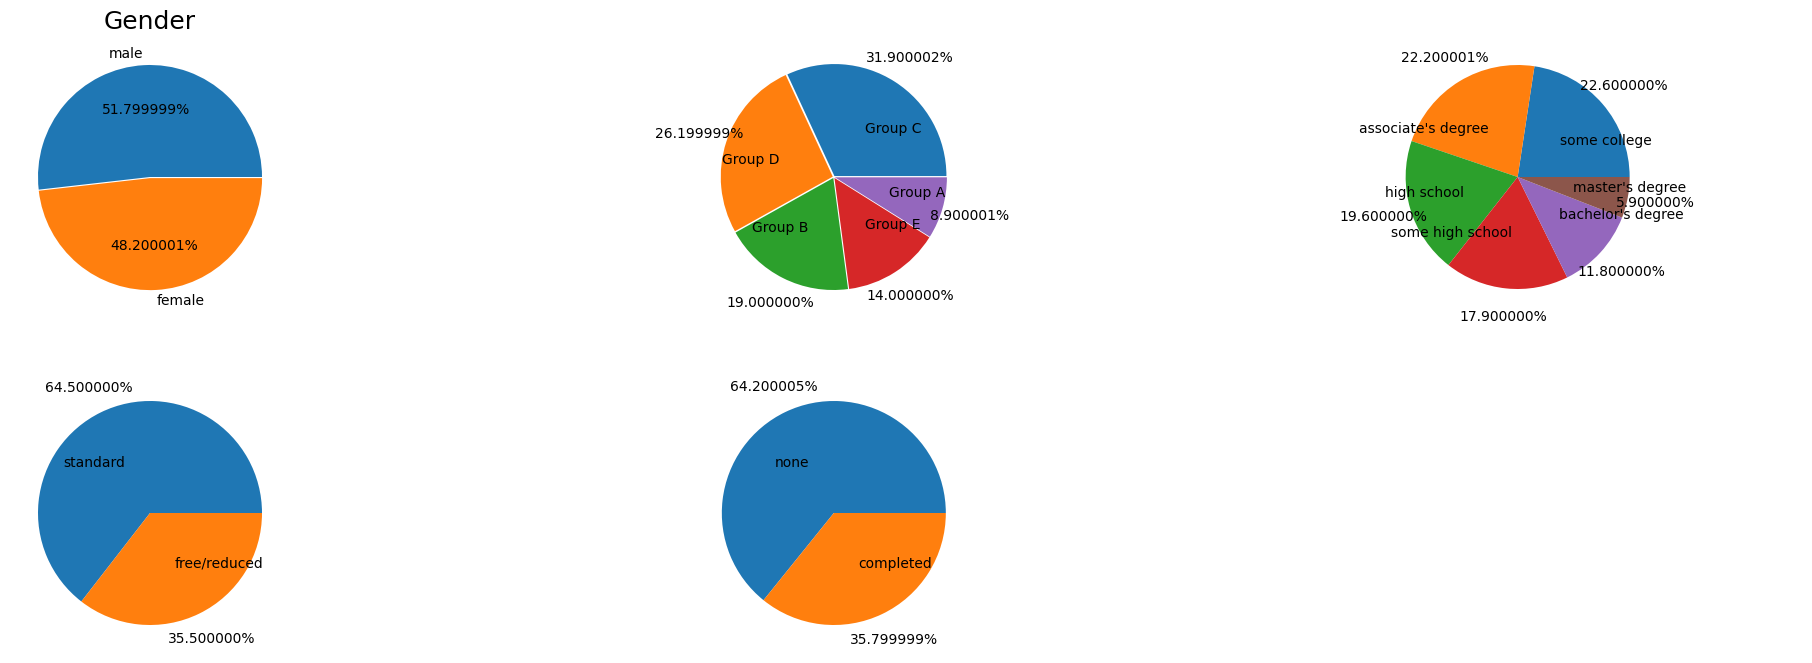

In [99]:
fig,ax=plt.subplots(2,3,figsize=(25,8))
plt.subplot(231)
size=studentData.gender.value_counts()
labels=["male","female"]
color=["red","green"]
plt.pie(size,labels=labels,explode=[0,0.01],autopct = '%2f%%')
plt.title("Gender",fontsize=18)

plt.subplot(232)
size=studentData["race/ethnicity"].value_counts()
labels=['Group C', 'Group D','Group B','Group E','Group A']
plt.pie(size,labels=labels,explode=[0.01,0.01,0.01,0.01,0.01],pctdistance=1.25,labeldistance=0.5,autopct="%2f%%")

plt.subplot(233)
size=studentData["parental level of education"].value_counts()
labels=size.index
plt.pie(size,labels=labels,pctdistance=1.25,labeldistance=0.5,autopct="%2f%%")

plt.subplot(234)
size=studentData["lunch"].value_counts()
labels=size.index
plt.pie(size,labels=labels,pctdistance=1.25,labeldistance=0.5,autopct="%2f%%")

plt.subplot(235)
size=studentData["test preparation course"].value_counts()
labels=size.index
plt.pie(size,labels=labels,pctdistance=1.25,labeldistance=0.5,autopct="%2f%%")
plt.subplot(236)
plt.axis("off")

plt.show()

#### It is showing the percentage of each category in each feature

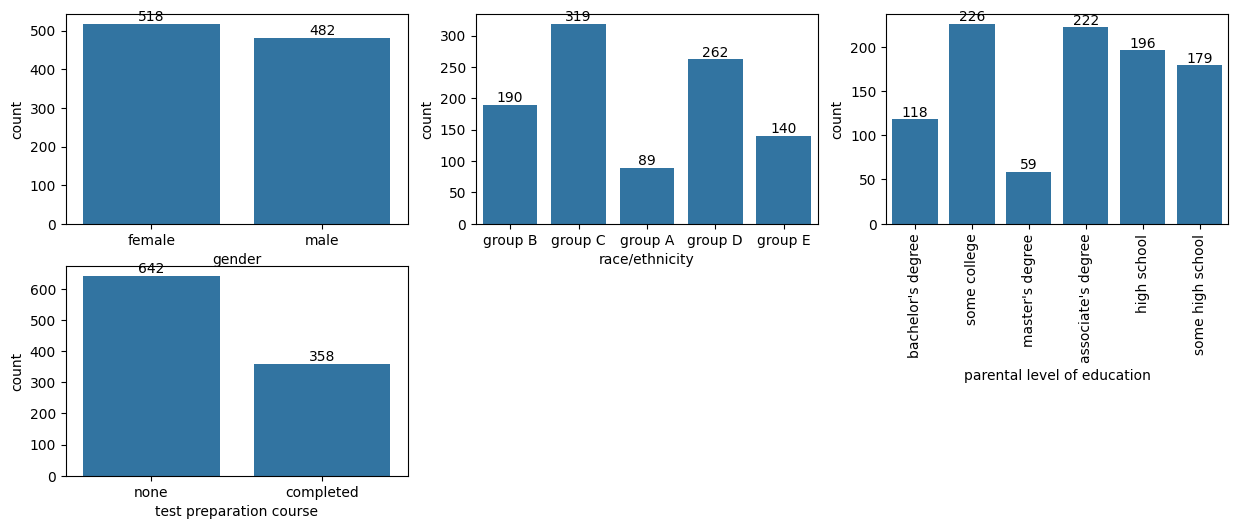

In [125]:
fig,ax=plt.subplots(2,3,figsize=(15,6))
plt.subplot(231)
ax=sns.countplot(data=studentData,x="gender")
ax.containers
ax.bar_label(ax.containers[0])
plt.subplot(232)
ax=sns.countplot(data=studentData,x="race/ethnicity")
ax.containers
ax.bar_label(ax.containers[0])
plt.subplot(233)
ax=sns.countplot(data=studentData,x="parental level of education")
plt.xticks(rotation=90)
ax.containers
ax.bar_label(ax.containers[0])
plt.subplot(234)
ax=sns.countplot(data=studentData,x="test preparation course")
ax.containers
ax.bar_label(ax.containers[0])
plt.subplot(235)
plt.axis("off")
plt.subplot(236)
plt.axis("off")
plt.show()


##### It  is showing the total counts of each category


### Conclusion:
- test preparation course dosen't give any significancial impact but yes it is helpful to increase the average marks
- females have higher average marks but have lower in maths 
- group A students are less in number and their average scores are also less
- parental education is not very impactful feature but yes students whose parents have higher education level are having slightly higher average level